# **cephalometry project:**
## **2D cephalometry landmark localization with CNN** 






# Step 1 : Auxiliary steps

 importing essential python libraries

In [1]:
%matplotlib inline
import cv2
import sys
import tensorflow as tf
import numpy as np
import skimage.io as io
import os
from sklearn.model_selection import train_test_split
from math import*
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from scipy.ndimage.interpolation import zoom

Using TensorFlow backend.


# Step 2 : Creating dataset

In [0]:
#create dataset
train=[]
label=[]
for i in range(1,301):
    img = io.imread(os.path.join("drive/My Drive/Cephalometry_2d_final/RawImage/TrainingData", "%d_crop.bmp" % i),)
    img=img[0:2176,:]
    img = zoom(img, zoom=0.25, order=1)
    train.append(img)
for j in range(1,301):
    f = open(os.path.join("drive/My Drive/Cephalometry_2d_final/400_senior", "%d.txt" % j))
    fp = open(os.path.join("drive/My Drive/Cephalometry_2d_final/400_junior", "%d.txt" % j))
    line=f.readlines()
    linep=fp.readlines()
    y=(int(line[8].split(',')[1])+int(linep[8].split(',')[1])-200)//8
    x=(int(line[8].split(',')[0])+int(linep[8].split(',')[0]))//8
    coordinate=np.array([x,y])
    label.append(coordinate)
x_train=np.array(train)
y_train=np.array(label)


# Step 3 :Train-Test split


In [0]:
x_train=np.expand_dims(x_train,axis=3)
x_train, x_test, y_train, y_test =train_test_split(x_train,y_train, test_size=0.2, random_state=6)
x_train, x_validate, y_train, y_validate =train_test_split(x_train,y_train, test_size=0.25, random_state=6)

Check the shape of dataset

In [0]:
print(x_train.shape)
print(y_train.shape)

(180, 544, 480, 1)
(180, 2)


define loss function for CNN model

In [0]:
def euclidean_distance(y_true, y_pred):
  return K.mean(K.sqrt(K.sum(K.square(y_pred-y_true),axis=-1)))

# Step 4: Define the model

#YOLO V1 



In [0]:
input_shape = x_train[0].shape

# Convolution block 0
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(7, 7), strides=(2, 2), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1),input_shape =input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2)))

# Convolution block 1
model.add(Conv2D(filters=48, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1),input_shape =input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2)))

# Convolution block 2
model.add(Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2)))

# Convolution block 3
model.add(Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2)))

# Convolution block 4
model.add(Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))


# Convolution block 5
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.1)))


#flatten and softmax
model.add(Flatten())
model.add(Dense(units=256))
model.add(Dense(units=128))
model.add(Dense(units=1024))
model.add(Dropout(0.25))
model.add(Dense(units=2, activation='linear'))

# Define the optimizer

keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# Compile the model

model.compile(loss=euclidean_distance,optimizer='Adam', metrics=["accuracy"])

# Step 5: data augmentation



In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=False,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = False, # Randomly zoom image
        width_shift_range=False,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=False,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)


# Step 6 : Training


In [0]:
epochs = 20
batch_size = 5
model_checkpoint = ModelCheckpoint('cnn_regression.hdf5', monitor='loss',verbose=1, save_best_only=True)
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
36/36 [==============================] - 9s 250ms/step - loss: 472.9926 - acc: 0.9500 - val_loss: 142.3257 - val_acc: 1.0000
Epoch 2/20
36/36 [==============================] - 2s 69ms/step - loss: 84.8515 - acc: 1.0000 - val_loss: 32.9754 - val_acc: 1.0000
Epoch 3/20
36/36 [==============================] - 2s 69ms/step - loss: 65.9185 - acc: 1.0000 - val_loss: 71.6209 - val_acc: 1.0000
Epoch 4/20
36/36 [==============================] - 2s 69ms/step - loss: 58.8087 - acc: 1.0000 - val_loss: 56.6299 - val_acc: 1.0000
Epoch 5/20
36/36 [==============================] - 2s 69ms/step - loss: 103.6755 - acc: 1.0000 - val_loss: 59.2546 - val_acc: 1.0000
Epoch 6/20
36/36 [==============================] - 2s 69ms/step - loss: 53.1282 - acc: 1.0000 - val_loss: 92.6350 - val_acc: 1.0000
Epoch 7/20
36/36 [==============================] - 2s 69ms/step - loss: 46.5236 - acc: 1.0000 - val_loss: 38.5265 - val_acc: 1.0000
Epoch 8/20
36/36 [==============================] - 2s 69ms/step 

# Step 7 : History visulization


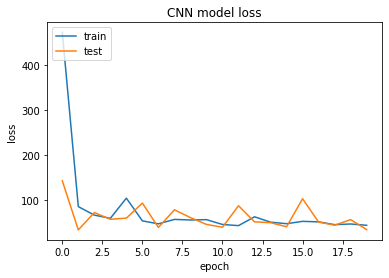

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Step 8: Evaluation



In [0]:
#euclidean distance
result=model.predict(x_test)
error=result-y_test
distance=[]
for i in range(error.shape[0]):
    ed=np.sqrt(error[i,0]**2+error[i,1]**2)
    distance.append(ed)
distance=np.array(distance)
print("overall mean distance error is",np.mean(distance))


overall mean distance error is 31.319557573206044
